# Estimating-the-correlation-length 

* A central parameter for the DIVAnd analysis is the correlation length
* It determines whether two points separated by a given distance are correlated or not
* DIVAnd includes several tools to estimate the correlation length
* We will start with a 2D case and consider the 3D case

In [1]:
using Base.Test
import divand
using PyPlot

Download the file `Salinity.bigfile` (if it is not already present). It will be placed in the same directory as this notebook. This file based on the World Ocean Database.

In [2]:
fname = "Salinity.bigfile"

if !isfile(fname)
    download("https://b2drop.eudat.eu/s/Bv9Fj0YGC0zp2vn/download",fname)
else
    info("Data file already downloaded")
end

INFO: Data file already downloaded


Load the data

In [3]:
value,lon,lat,depth,time,ids = divand.loadbigfile(fname);

`min_count` is the minimum number of observations per distance bin and the call to `srand` ensures a reproducible sequence of random numbers.

In [4]:
min_count = 10000
srand(12345) # this can be any number

MersenneTwister(UInt32[0x00003039], Base.dSFMT.DSFMT_state(Int32[-870096391, 1072918504, -1812426662, 1073255081, -733866021, 1073404543, 807620846, 1073368448, 1919433844, 1072852359  …  -362113007, 1073100625, -166402106, 1073460158, -1907020342, 721295190, -750225566, -1300227565, 382, 0]), [1.23492, 1.8786, 1.58943, 1.73971, 1.27882, 1.41606, 1.79603, 1.87291, 1.50593, 1.24298  …  1.44883, 1.48135, 1.26085, 1.13296, 1.40201, 1.96834, 1.54705, 1.81791, 1.09133, 1.20071], 382)

## 2D case

* First lets consider only the data on a 2D surface (longitude and latitude)
* We use the function `divand.fit_isotropic`


In [5]:
?divand.fit_isotropic

No documentation found.

Binding `divand.fit_isotropic` does not exist.


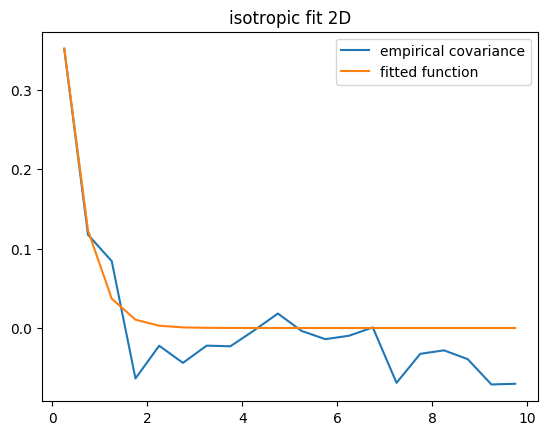

PyObject Text(0.5,1,u'isotropic fit 2D')

In [13]:
# surface values for the month January
sel = (depth .> 10) .& Dates.month.(time) .== 1;
x = (lon[sel],lat[sel]);
v = value[sel] - mean(value[sel]);
distbin = 0:0.5:10

len,var0,distx,covar,fitcovar = divand.fit_isotropic(x,v,distbin,min_count)


figure()
plot(distx,covar, label = "empirical covariance")
plot(distx,fitcovar, label = "fitted function")
legend()
title("isotropic fit 2D")

The function `divand.fit` allows for different correlation length-scale for different dimensions.

In [6]:
?divand.fit

```
var0opt,lensopt,distx,covar,fitcovar = fit(x,v,distbin,min_count;
         alpha = divand.alpha_default(length(x)),
         minlen = zeros(length(x)),
         maxlen = ones(length(x)),
         tolrel = 1e-4,
         lens0 = ones(length(x)),
         var0 = 1.,
         minvar0 = 0.,
         maxvar0 = 2.,
         maxpoints = 1000000,
         distfun = (xi,xj,lens) -> sqrt(sum(abs2,(xi-xj)./lens)),
         progress = (iter,var,len,fitness) -> nothing
         )
```

The same as the function `fit_isotropic` except that now the correlation  length-scale `lens0`, `minlen`, `maxlen`, `lensopt` are a vectors  (one value per dimension). The distance function `distfun` uses an additional  parameter to compute the normalized distance.

The note of the optional parameters in `divafit` which also applies here.


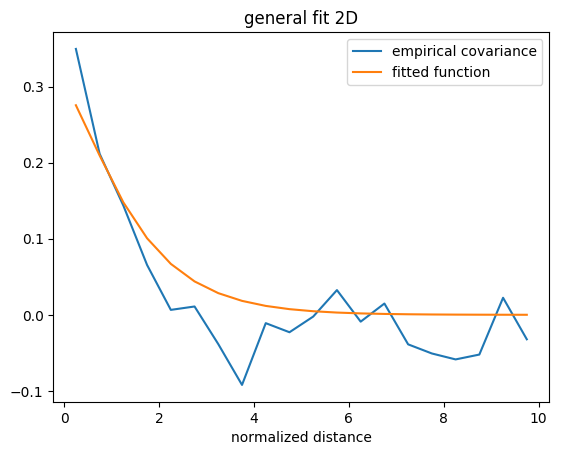

PyObject <matplotlib.legend.Legend object at 0x7f6288b457d0>

In [14]:
var0opt,lensopt,distx,covar,fitcovar = divand.fit(x,v,distbin,min_count)

figure()
plot(distx,covar, label = "empirical covariance")
plot(distx,fitcovar, label = "fitted function")
xlabel("normalized distance")
title("general fit 2D")
legend()

## 3D

* The vertical dimension is quite pecuriliar in the sense that it should probably increase with depth.
* Let's first ignore this aspect

### General fit in 3D without transformation

|       var0 |   length 1 |   length 2 |   length 3 |    fitness |
|------------|------------|------------|------------|------------|
|          1 |        0.5 |        0.5 |         10 |    10.4221 |
|        1.5 |        0.5 |        0.5 |         10 |     8.4971 |
|        1.5 |      0.875 |        0.5 |         10 |    8.59122 |
|        1.5 |        0.5 |      0.875 |         10 |    7.21787 |
|        1.5 |        0.5 |      0.875 |       17.5 |     5.7594 |
|    1.85197 |   0.487093 |    1.05042 |    21.5001 |    4.68472 |
|    1.74316 |   0.469356 |    1.29149 |    26.9969 |    3.55403 |
|    1.81769 |   0.225961 |    1.31088 |    32.5784 |    3.27546 |
|    1.89002 |   0.473635 |    1.36532 |    37.9961 |    2.59466 |
|    1.98654 |   0.526696 |    1.71535 |    40.0004 |    2.58611 |
|    1.96409 |   0.524688 |    1.73481 |     40.651 |    2.49853 |
|    1.67486 |   0.640047 |    1.68553 |    46.2308 |    2.33515 |
|    1.60078 |   0.300351 |    1.70832 |    49.1719 |    1.844

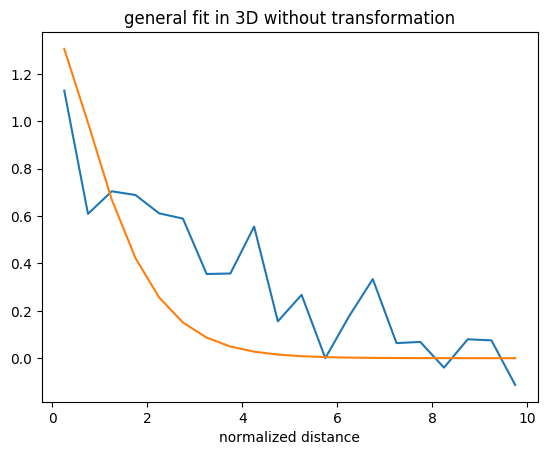

|    1.37003 |   0.193115 |    2.02876 |     50.047 |    1.27891 |


PyObject Text(0.5,1,u'general fit in 3D without transformation')

In [15]:
sel = Dates.month.(time) .== 1;


x = (lon[sel],lat[sel],depth[sel]);
v = value[sel] - mean(value[sel]);
distbin = 0:0.5:10

var0opt,lensopt,distx,covar,fitcovar =
    divand.fit(x,v,distbin,min_count;
        lens0 = [0.5, 0.5, 10.],
        maxlen = [10,10,1000],
        progress = divand.fitprogress)

figure()
plot(distx,covar, label = "empirical covariance")
plot(distx,fitcovar, label = "fitted function")
xlabel("normalized distance")
title("general fit in 3D without transformation")

The vertical coordinate is likely to increase with depth
We take this into account using a transformed coordinate 

|       var0 |   length 1 |   length 2 |   length 3 |    fitness |
|------------|------------|------------|------------|------------|
|          1 |        0.5 |        0.5 |         10 |    1.95644 |
|        1.5 |        0.5 |        0.5 |         10 |    1.42518 |
|        1.5 |      0.875 |        0.5 |         10 |    1.85296 |
|        1.5 |        0.5 |      0.875 |         10 |    1.06268 |
|        1.5 |        0.5 |      0.875 |       17.5 |    1.12955 |
|    1.84261 |   0.293093 |    1.05033 |    9.35312 |    1.06726 |
|    1.31697 |   0.403245 |    0.95699 |     9.6975 |    1.01132 |
|    1.27279 |   0.500679 |    1.11112 |    9.12885 |    1.24858 |
|    1.31697 |   0.403245 |   0.945448 |    7.86289 |    1.33059 |
|    1.30285 |    0.35089 |   0.942438 |    13.2803 |   0.758714 |
|     1.2952 |   0.449511 |    1.08102 |     14.854 |   0.906412 |
|     1.2937 |   0.386895 |   0.919283 |    13.3665 |   0.806653 |
|    1.35677 |   0.195488 |   0.902833 |     15.047 |    1.329

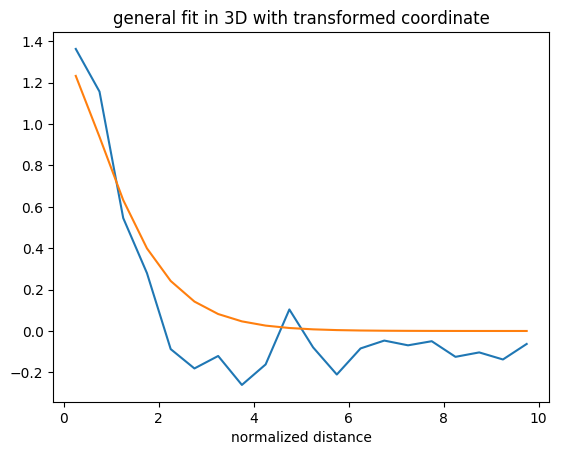

You need to multiply the coefficient a and b of lenz by 13.317678794536066


In [17]:
const a = 10.
const b = 1./15

# lenz and integ_lenz are related such that the
# derivative of integ_lenz is 1/lenz

lenz(z) = a + b*z
integ_lenz(z) = log.(a + b*z) / b 


x = (lon[sel],lat[sel],integ_lenz(depth[sel]));

var0opt,lensopt,distx,covar,fitcovar =
    divand.fit(x,v,distbin,min_count;
        lens0 = [0.5, 0.5, 10.],
        maxlen = [10,10,1000],
        progress = divand.fitprogress)

figure()
plot(distx,covar, label = "empirical covariance")
plot(distx,fitcovar, label = "fitted function")
xlabel("normalized distance")
title("general fit in 3D with transformed coordinate")

println("You need to multiply the coefficient a and b of lenz by $(lensopt[3])")